In [1]:
%pip install numpy pandas seaborn matplotlib

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from functions import *


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
goyal_welch_data = pd.read_csv('../macro_data/GoyalWelchPredictorData2022Monthly.csv', index_col=0)
goyal_welch_data.index = pd.to_datetime(goyal_welch_data.index, format='%Y%m')

for column in goyal_welch_data.columns:
    goyal_welch_data[column] = [float(str(x).replace(',', '')) for x in goyal_welch_data[column]]


In [3]:
goyal_welch_data

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar,csp,CRSP_SPvw,CRSP_SPvwx
yyyymm,,,,,,,,,,,,,,,,,
1871-01-01,4.44,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-02-01,4.50,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004967,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-03-01,4.61,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-04-01,4.74,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1871-05-01,4.86,0.2600,0.4000,NaN,NaN,NaN,NaN,NaN,NaN,0.004643,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,3955.00,64.8854,188.8067,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.001900,-0.000354,-0.0421,-0.0293,0.003349,NaN,-0.040305,-0.042052
2022-09-01,3585.62,65.3183,187.0800,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.001900,0.002151,-0.0769,-0.0526,0.004934,NaN,-0.091495,-0.092876
2022-10-01,3871.98,65.8531,182.3033,0.218935,0.0372,0.0510,0.0626,0.0398,-0.015252,0.002300,0.004056,-0.0139,-0.0103,0.006504,NaN,0.080248,0.079196


# SPY ticker 

In [4]:
spy_monthly_returns = pd.read_csv('../macro_data/spy_monthly_returns.csv', index_col=0)

spy_monthly_returns.index = pd.to_datetime(spy_monthly_returns.index, format='%Y-%m')


In [5]:
start_date = goyal_welch_data.index.min() if goyal_welch_data.index.min() > spy_monthly_returns.index.min() else spy_monthly_returns.index.min()
end_date = goyal_welch_data.index.max() if goyal_welch_data.index.max() < spy_monthly_returns.index.max() else spy_monthly_returns.index.max()

start_date, end_date

(Timestamp('1993-02-01 00:00:00'), Timestamp('2022-12-01 00:00:00'))

In [6]:
filtered_spy_monthly_returns = spy_monthly_returns.loc[start_date:end_date]
filtered_goyal_welch_data = goyal_welch_data.loc[start_date:end_date]

filtered_goyal_welch_data['excess_returns'] = spy_monthly_returns['SPY'] - filtered_goyal_welch_data['Rfree']

filtered_goyal_welch_data['excess_returns']

/tmp/ipykernel_61961/1887622125.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_goyal_welch_data['excess_returns'] = spy_monthly_returns['SPY'] - filtered_goyal_welch_data['Rfree']


yyyymm
1993-02-01    0.008468
1993-03-01    0.019900
1993-04-01   -0.027988
1993-05-01    0.024770
1993-06-01    0.001107
                ...   
2022-08-01   -0.042702
2022-09-01   -0.094346
2022-10-01    0.078976
2022-11-01    0.052691
2022-12-01   -0.060928
Name: excess_returns, Length: 359, dtype: float64

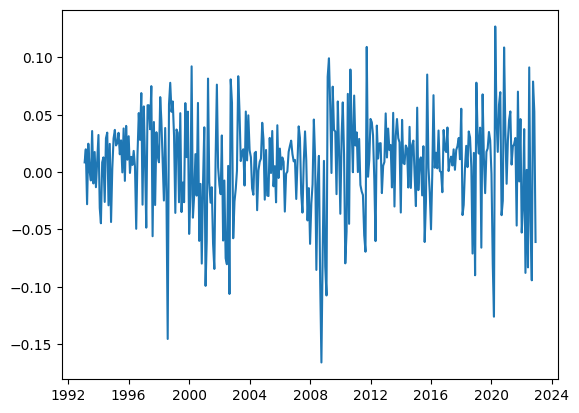

In [7]:
plt.plot(filtered_goyal_welch_data['excess_returns'])

Text(0.5, 1.0, 'leverage = 0.6')

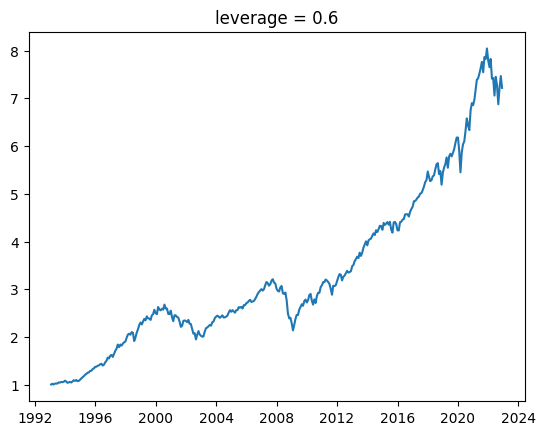

In [8]:
leverage = 0.6
strategy_returns = 1 + filtered_goyal_welch_data.Rfree + leverage * filtered_goyal_welch_data.excess_returns
plt.plot(np.cumprod(strategy_returns))
plt.title(f'leverage = {leverage}')

In [9]:
cleaned_data = filtered_goyal_welch_data.drop(columns=['csp']).fillna(0)

In [10]:
cleaned_data[['Index', 'D12', 'E12']] = (cleaned_data[['Index', 'D12', 'E12']] / cleaned_data[['Index', 'D12', 'E12']].shift(1)).fillna(0)
print(cleaned_data)

               Index       D12       E12       b/m     tbl     AAA     BAA  \
yyyymm                                                                       
1993-02-01  0.000000  0.000000  0.000000  0.385960  0.0293  0.0771  0.0839   
1993-03-01  1.018697  1.002515  1.012762  0.333614  0.0295  0.0758  0.0815   
1993-04-01  0.974583  1.001178  0.991431  0.334350  0.0287  0.0746  0.0814   
1993-05-01  1.022717  1.001169  0.991357  0.324882  0.0296  0.0743  0.0821   
1993-06-01  1.000755  1.001175  0.991282  0.325931  0.0307  0.0733  0.0807   
...              ...       ...       ...       ...     ...     ...     ...   
2022-08-01  0.957560  1.006717  0.990938  0.227429  0.0263  0.0407  0.0515   
2022-09-01  0.906604  1.006672  0.990855  0.249478  0.0313  0.0459  0.0569   
2022-10-01  1.079863  1.008188  0.974467  0.218935  0.0372  0.0510  0.0626   
2022-11-01  1.053753  1.008123  0.973799  0.207182  0.0415  0.0490  0.0607   
2022-12-01  0.941029  1.008056  0.973093  0.216199  0.0425  0.04

In [11]:
signal_columns = ['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar']

data_for_signals = cleaned_data[signal_columns].shift(1).fillna(0) # shifting of signals happens here !
labels = cleaned_data.excess_returns.values.reshape(-1, 1)
data_for_signals['infl'] = data_for_signals['infl'].shift(1).fillna(0) # this is because inflation is actually published later
signals = data_for_signals.values
data_for_signals.shape, data_for_signals.columns

((359, 14),
 Index(['Index', 'D12', 'E12', 'b/m', 'tbl', 'AAA', 'BAA', 'lty', 'ntis',
        'Rfree', 'infl', 'ltr', 'corpr', 'svar'],
       dtype='object'))

In [12]:
data_for_signals

,Index,D12,E12,b/m,tbl,AAA,BAA,lty,ntis,Rfree,infl,ltr,corpr,svar
yyyymm,,,,,,,,,,,,,,
1993-02-01,0.000000,0.000000,0.000000,0.000000,0.0000,0.0000,0.0000,0.0000,0.000000,0.0000,0.000000,0.0000,0.0000,0.000000
1993-03-01,0.000000,0.000000,0.000000,0.385960,0.0293,0.0771,0.0839,0.0698,0.040728,0.0022,0.000000,0.0354,0.0256,0.001147
1993-04-01,1.018697,1.002515,1.012762,0.333614,0.0295,0.0758,0.0815,0.0702,0.037106,0.0025,0.003506,0.0021,0.0025,0.001005
1993-05-01,0.974583,1.001178,0.991431,0.334350,0.0287,0.0746,0.0814,0.0701,0.039813,0.0024,0.003494,0.0072,0.0052,0.001005
1993-06-01,1.022717,1.001169,0.991357,0.324882,0.0296,0.0743,0.0821,0.0701,0.040255,0.0022,0.002786,0.0047,0.0020,0.000817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-01,1.091116,1.006762,0.991019,0.218187,0.0223,0.0406,0.0521,0.0290,-0.006121,0.0008,0.013736,0.0270,0.0324,0.003188
2022-09-01,0.957560,1.006717,0.990938,0.227429,0.0263,0.0407,0.0515,0.0290,-0.009732,0.0019,-0.000118,-0.0421,-0.0293,0.003349
2022-10-01,0.906604,1.006672,0.990855,0.249478,0.0313,0.0459,0.0569,0.0352,-0.011292,0.0019,-0.000354,-0.0769,-0.0526,0.004934


In [13]:
normalize_raw_data = True
cheat_and_use_future_data = False  # set to True if you want to have
#our fun experiment to show how even know a bit about the future can drastically imprpve performance

shrinkage_list = [0.00000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]

split = int(signals.shape[0] / 2)
train_labels = labels[:split]
test_labels = labels[split:]

if normalize_raw_data:
    signals[:split, :], normalization_based_on_train = normalize(signals[:split], use_std=False)
    # this is our fun experiment to show how even know a bit about the future can drastically imprpve performance
    if cheat_and_use_future_data:
      signals[split:, :] = normalize(signals[split:, :])[0]
    else:
      signals[split:, :] = normalize(signals[split:, :],
                                     ready_normalization=normalization_based_on_train)[0]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=signals[:split, :],
                                                                labels=train_labels,
                                                                future_signals=signals[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2008-01-01     -0.007831     -0.007823     -0.007569     -0.005829   
2008-02-01     -0.002191     -0.002225     -0.002358     -0.002860   
2008-03-01     -0.009707     -0.009652     -0.009209     -0.007714   
2008-04-01     -0.014347     -0.014291     -0.013771     -0.011025   
2008-05-01     -0.008964     -0.009122     -0.009987     -0.011068   
...                  ...           ...           ...           ...   
2022-08-01     -0.001584     -0.001483     -0.000412      0.003599   
2022-09-01     -0.003225     -0.003105     -0.002375     -0.000250   
2022-10-01      0.003858      0.003879      0.003830      0.002663   
2022-11-01     -0.007049     -0.006873     -0.005311      0.000176   
2022-12-01      0.013482      0.013256      0.012066      0.008484   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [14]:
pd.DataFrame(beta_estimate_using_train_sample, columns=shrinkage_list, index=data_for_signals.columns)

,1.000000e-08,1.000000e-05,1.000000e-04,1.000000e-03,1.000000e-02,1.000000e-01,1.000000e+00,1.000000e+01,1.000000e+02,1.000000e+03
Index,-0.095421,-0.093636,-0.079863,-0.029566,-0.001275,0.001515,0.001083,0.000204,0.000022,2.256697e-06
D12,-0.000726,-0.000696,0.000878,0.004391,0.003882,0.002346,0.001319,0.000244,0.000027,2.682787e-06
E12,0.135714,0.133914,0.117590,0.054820,0.012432,0.003197,0.001274,0.000225,0.000024,2.467318e-06
b/m,0.007076,0.007461,0.009803,0.016444,0.016214,0.005098,0.000878,0.000117,0.000012,1.232423e-06
tbl,0.020992,0.020987,0.021465,0.020128,0.009216,0.002860,0.000722,0.000109,0.000012,1.167265e-06
AAA,-0.097016,-0.091307,-0.065371,-0.028150,-0.007407,0.000080,0.000648,0.000129,0.000014,1.432262e-06
BAA,-0.039821,-0.042751,-0.052149,-0.036644,-0.009548,-0.000133,0.000689,0.000140,0.000015,1.559439e-06
lty,0.115535,0.112569,0.095018,0.041400,0.005346,0.001648,0.000735,0.000129,0.000014,1.414646e-06
ntis,0.003292,0.003379,0.004385,0.009310,0.008391,0.002379,0.000432,0.000059,0.000006,6.182648e-07
Rfree,-0.007194,-0.007318,-0.008170,-0.005695,0.002781,0.001780,0.000473,0.000070,0.000007,7.536239e-07


In [15]:
market_timing_returns = oos_predictions * test_labels.reshape(-1, 1)
print(market_timing_returns) # we have one timing return for each value of z

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2008-01-01      0.000490      0.000489      0.000474      0.000365   
2008-02-01      0.000059      0.000060      0.000064      0.000078   
2008-03-01      0.000103      0.000103      0.000098      0.000082   
2008-04-01     -0.000658     -0.000655     -0.000632     -0.000506   
2008-05-01     -0.000119     -0.000121     -0.000133     -0.000147   
...                  ...           ...           ...           ...   
2022-08-01      0.000068      0.000063      0.000018     -0.000154   
2022-09-01      0.000304      0.000293      0.000224      0.000024   
2022-10-01      0.000305      0.000306      0.000302      0.000210   
2022-11-01     -0.000371     -0.000362     -0.000280      0.000009   
2022-12-01     -0.000821     -0.000808     -0.000735     -0.000517   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

In [16]:
cleaned_data = pd.concat([cleaned_data, market_timing_returns], axis=1)

In [17]:
tmp = cleaned_data[['excess_returns'] + shrinkage_list].iloc[split:]
tmp = tmp / tmp.std()
sr = sharpe_ratio(tmp)

Text(0.5, 1.0, 'SR=[0.56 0.23 0.23 0.27 0.4  0.57 0.73 0.55 0.54 0.53 0.53]')

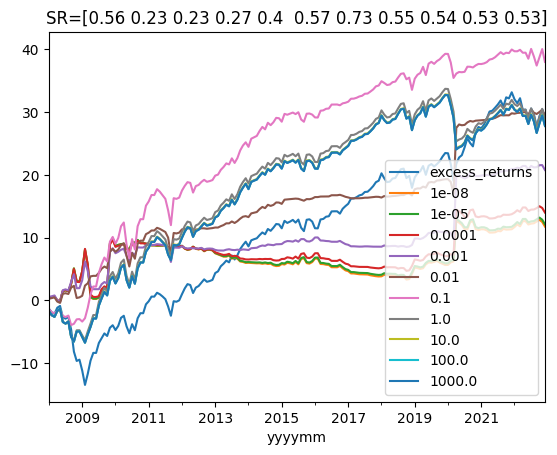

In [18]:
tmp.cumsum().plot()
plt.title(f'SR={sr.values.flatten()}')

In [19]:
tstat = regression_with_tstats(predicted_variable=tmp[1.], explanatory_variables=tmp['excess_returns'])
print(tstat)

const             0.7
excess_returns    5.5
Name: z, dtype: float64


In [20]:
P = 50000
d = 14
scale = 1.
omega = scale * np.sqrt(2) * np.random.randn(d, P) / np.sqrt(d)
ins_sin = np.sqrt(2) * np.sin(signals @ omega) # this is n times P
ins_cos = np.sqrt(2) * np.cos(signals @ omega) # this is also n times P
random_features = np.append(ins_sin, ins_cos, axis=1) # this is n times (2P)

In [21]:
random_features.shape

(359, 100000)

In [22]:
split = int(signals.shape[0] / 2)

labels = cleaned_data.excess_returns.values.reshape(-1, 1)

train_labels = labels[:split]
test_labels = labels[split:]

beta_estimate_using_train_sample, oos_predictions = ridge_regr(signals=random_features[:split, :],
                                                                labels=train_labels,
                                                                future_signals=random_features[split:, :],
                                                                shrinkage_list=shrinkage_list)

oos_predictions = pd.DataFrame(oos_predictions, index=cleaned_data.index[split:], columns = shrinkage_list)
print(oos_predictions)

            1.000000e-08  1.000000e-05  1.000000e-04  1.000000e-03  \
yyyymm                                                               
2008-01-01     -0.721621     -0.690858     -0.573893     -0.343537   
2008-02-01     -0.121598     -0.072575     -0.119438     -0.094286   
2008-03-01     -1.175356     -1.044297     -0.777963     -0.410832   
2008-04-01     -0.493599     -0.410480     -0.529495     -0.372914   
2008-05-01     -0.656233     -0.778097     -0.841290     -0.586177   
...                  ...           ...           ...           ...   
2022-08-01      0.866973      0.619492      0.502178      0.491051   
2022-09-01     -0.102327     -0.024298      0.130614      0.129568   
2022-10-01     -0.423218     -0.264062     -0.001347      0.079766   
2022-11-01      0.342286      0.362534      0.357995      0.256187   
2022-12-01     -0.518257     -0.470108     -0.156804      0.114234   

            1.000000e-02  1.000000e-01  1.000000e+00  1.000000e+01  \
yyyymm             

Text(0.5, 1.0, 'sr=excess_returns    0.56\n0.0               0.23\n0.00001           0.23\n0.0001            0.27\n0.001             0.40\n0.01              0.57\n0.1               0.73\n1.0               0.55\n10.0              0.54\n100.0             0.53\n1000.0            0.53\n1e-08_complex     0.24\n1e-05_complex     0.27\n0.0001_complex    0.23\n0.001_complex     0.24\n0.01_complex      0.19\n0.1_complex       0.12\n1.0_complex       0.19\n10.0_complex      0.45\n100.0_complex     0.48\n1000.0_complex    0.54\nmean              0.62\ndtype: float64')

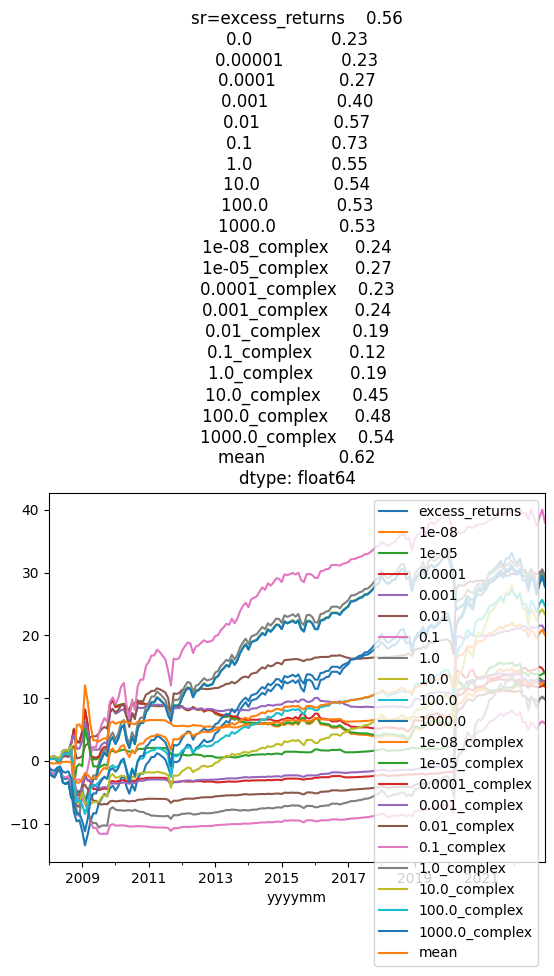

In [23]:
market_timing_returns_complex = oos_predictions * test_labels
market_timing_returns_complex.columns = [f'{x}_complex' for x in market_timing_returns_complex.columns]

cleaned_data = pd.concat([cleaned_data, market_timing_returns_complex], axis=1)

# 'excess_returns' are just market returns; it is important we keep them
# shrinkage_list: these are the columns corresponding to the simple linear model with just 13 predictors
tmp = cleaned_data[['excess_returns'] + shrinkage_list + list(market_timing_returns_complex.columns)].iloc[split:, :]
tmp = tmp / tmp.std()
tmp['mean'] = tmp.mean(1)
sr = sharpe_ratio(tmp)
tmp.cumsum().plot()
plt.title(f'sr={sr}')
#plt.savefig(os.path.join(folder, 'performance_pl9ot.jpeg'))

In [24]:
cleaned_data.corr()[0.0001]

Index            -0.072099
D12              -0.117327
E12               0.137106
b/m              -0.041029
tbl               0.003475
AAA              -0.009307
BAA              -0.001242
lty              -0.004693
ntis              0.025290
Rfree             0.000400
infl             -0.066332
ltr              -0.059998
corpr            -0.122401
svar              0.087814
CRSP_SPvw        -0.067044
CRSP_SPvwx       -0.067252
excess_returns   -0.072589
0.0               0.996436
0.00001           0.997197
0.0001            1.000000
0.001             0.922939
0.01              0.658815
0.1               0.126481
1.0              -0.222627
10.0             -0.249423
100.0            -0.251929
1000.0           -0.252178
1e-08_complex     0.264727
1e-05_complex     0.497669
0.0001_complex    0.574292
0.001_complex     0.562120
0.01_complex      0.507325
0.1_complex       0.405820
1.0_complex       0.305719
10.0_complex      0.309549
100.0_complex     0.212534
1000.0_complex    0.007408
N

In [25]:
tstats = regression_with_tstats(predicted_variable=tmp['0.001_complex'], explanatory_variables=tmp[['excess_returns', 0.0001]])
print(tstats)

const            -1.0
excess_returns    2.3
0.0001            1.8
Name: z, dtype: float64
